In [1]:
# feature selection: F-score top 50
# KNN, RandomForest, Bayesian, Histgramboost
# 10-fold cross validation

In [2]:
import os
import csv
import pandas as pd
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
for f in os.listdir():
    if f.endswith('.csv'):
        print(f)

filtered_0_df_0.csv
filtered_0_df_1.csv
filtered_0_df_2.csv
filtered_1_df_0.csv
filtered_1_df_1.csv
filtered_1_df_2.csv
filtered_2_df_0.csv
filtered_2_df_1.csv
filtered_2_df_2.csv
filtered_2_df_3.csv
filtered_2_df_4.csv
filtered_2_df_5.csv
annot_0_df_0.csv
annot_0_df_1.csv
annot_0_df_2.csv
annot_1_df_0.csv
annot_1_df_1.csv
annot_1_df_2.csv
annot_2_df_0.csv
annot_2_df_1.csv
annot_2_df_2.csv
annot_2_df_3.csv
annot_2_df_4.csv
annot_2_df_5.csv
filtered_df_1_1.csv
mild_X_train.csv
mild_X_test.csv
mild_y_train.csv
mild_y_test.csv
severe_X_train.csv
severe_X_test.csv
severe_y_train.csv
severe_y_test.csv
control_X_train.csv
control_X_test.csv
control_y_train.csv
control_y_test.csv
all_df_train.csv
all_df_test.csv
all_df_X_train.csv
all_df_X_test.csv
all_df_y_train.csv
all_df_y_test.csv


In [4]:
X_train = pd.read_csv(os.path.join(os.getcwd(), 'all_df_X_train.csv'))
y_train = pd.read_csv(os.path.join(os.getcwd(), 'all_df_y_train.csv'))

X_test = pd.read_csv(os.path.join(os.getcwd(), 'all_df_X_test.csv'))
y_test = pd.read_csv(os.path.join(os.getcwd(), 'all_df_y_test.csv'))

In [5]:
X_train

,MTRNR2L12,HBB,MTRNR2L8,TAOK1,FTL,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,...,HERC5,CES1,EIF2S2,HLA-DRB1,RPL38,CXCL10,ACTG1,CANX,HNRNPA2B1,CSTB
0,0,0,0,0,307,77,68,159,196,0,...,0,0,0,81,13,0,21,8,5,13
1,2,0,0,1,58,11,11,99,64,2,...,0,0,0,0,0,0,6,0,0,1
2,10,0,1,4,148,30,18,131,124,6,...,0,0,0,0,0,0,23,0,0,2
3,9,0,0,2,759,26,12,36,15,7,...,7,0,0,139,13,31,34,0,18,20
4,0,0,0,0,6,10,6,22,24,0,...,0,0,0,0,1,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34884,24,0,3,2,2534,43,27,209,141,44,...,9,0,0,168,22,43,10,0,12,31
34885,21,0,3,4,16,36,25,77,135,19,...,0,0,0,0,0,0,0,0,0,0
34886,0,0,0,0,238,4,9,14,11,0,...,0,1,1,37,13,0,4,0,2,13
34887,7,0,1,4,1188,72,56,234,203,22,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train

,celltype
0,Macrophages
1,Macrophages
2,Macrophages
3,Macrophages
4,T
...,...
34884,Macrophages
34885,Epithelial
34886,Macrophages
34887,Macrophages


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=50)
X_train_selected = selector.fit_transform(X_train, y_train)

# See the gene names of the 50 selected features
selected_features = selector.get_support(indices=True)
selected_gene = X_train.columns[selected_features]
print(selected_gene)

# Construct a DataFrame to store the selected gene names and their corresponding scores
selected_gene_df = pd.DataFrame(selected_gene, columns=['Gene Names'])
selected_gene_df['Scores'] = selector.scores_[selected_features]
selected_gene_df = selected_gene_df.sort_values(by='Scores', ascending=False)

# Display the DataFrame with selected gene names and scores
print(selected_gene_df)

/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['FTL', 'CST3', 'C1QA', 'RPL31', 'SERPINA1', 'APOC1', 'CTSS', 'FCER1G',
       'AIF1', 'C1QB', 'HSP90B1', 'ATP5MPL', 'TXN', 'RPS20', 'UBB', 'MIF',
       'ANXA1', 'HLA-DQB1', 'S100A6', 'HLA-DPB1', 'SUB1', 'RPL21', 'RPL23',
       'S100A11', 'PSAP', 'UQCR11', 'RPL17', 'RPL27A', 'HLA-DRA', 'TMSB4X',
       'ELOB', 'RPLP0', 'RPS17', 'CSTA', 'SEC61G', 'SSR4', 'IGLV3-19', 'NEAT1',
       'PPIB', 'HLA-DQA1', 'FTH1', 'GAPDH', 'PSMA7', 'UQCRB', 'NDUFB1',
       'ANXA2', 'TYROBP', 'RPL7A', 'HLA-DRB1', 'ACTG1'],
      dtype='object')
   Gene Names       Scores
36   IGLV3-19  1587.224204
10    HSP90B1  1487.754315
18     S100A6   842.690763
20       SUB1   816.478707
35       SSR4   783.955547
13      RPS20   712.927567
38       PPIB   677.202184
31      RPLP0   546.272922
40       FTH1   538.947028
27     RPL27A   537.496408
15        MIF   494.412540
48   HLA-DRB1   485.618909
26      RPL17   478.810072
3       RPL31   471.153308
28    HLA-DRA   468.342228
19   HLA-DPB1   465.594698
32   

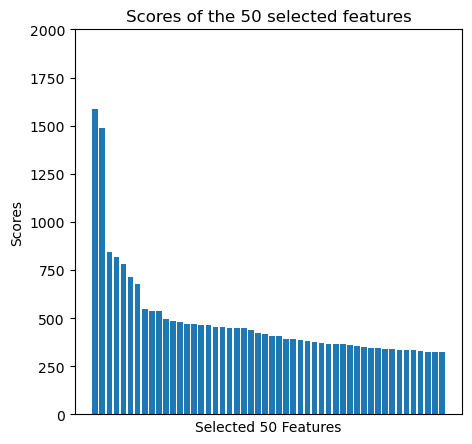

In [10]:
plt.figure(figsize=(5, 5))
plt.bar(selected_gene_df['Gene Names'], selected_gene_df['Scores'])
plt.xticks([])
plt.ylim(0, 2000)
plt.xlabel('Selected 50 Features')
plt.ylabel('Scores')
plt.title('Scores of the 50 selected features')
plt.show()

In [ ]:
# from X_train_covid, isolate columns according to the 50 selected features

X_train_50 = X_train.iloc[:, selected_gene_df.index]

X_train_50 = pd.concat([X_train_50, y_train['celltype']], axis=1)

In [14]:
X_train_50['celltype'].value_counts()

celltype
Macrophages    25999
T               5162
Epithelial      1227
Plasma           700
mDC              672
NK               665
B                171
Neutrophil       154
pDC              107
Mast              32
Name: count, dtype: int64

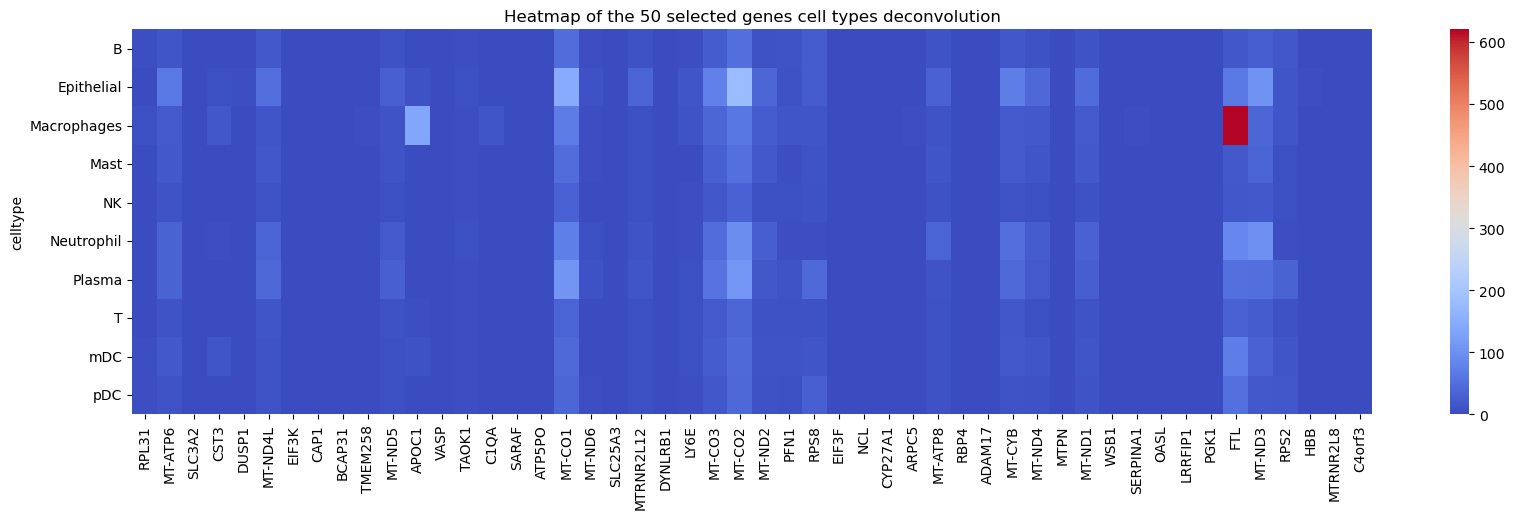

In [16]:
# Group rows by 'cell_type_coarse' and calculate the mean of each group

X_train_50_grouped = X_train_50.groupby(X_train_50['celltype']).mean()
X_train_50_grouped

# Plot the heatmap to show the transcriptome of the 50 selected genes

plt.figure(figsize=(20, 5))
sns.heatmap(X_train_50_grouped, cmap='coolwarm')
plt.title('Heatmap of the 50 selected genes cell types deconvolution')
plt.yticks(rotation=0)
plt.show()

In [18]:
X_train_selected = X_train.iloc[:, selected_gene_df.index]
X_test_selected = X_test.iloc[:, selected_gene_df.index]

In [22]:
X_train_selected

,RPL31,MT-ATP6,SLC3A2,CST3,DUSP1,MT-ND4L,EIF3K,CAP1,BCAP31,TMEM258,...,SERPINA1,OASL,LRRFIP1,PGK1,FTL,MT-ND3,RPS2,HBB,MTRNR2L8,C4orf3
0,0,161,0,36,9,4,5,6,9,0,...,15,0,12,4,307,172,17,0,0,0
1,0,23,0,13,0,22,0,0,0,0,...,0,0,0,0,58,38,16,0,0,0
2,0,51,0,22,0,39,0,0,0,0,...,0,0,0,0,148,50,16,0,1,0
3,14,4,0,0,0,5,9,8,0,17,...,0,2,9,9,759,10,25,0,0,6
4,1,14,0,1,1,1,1,1,0,0,...,0,0,0,0,6,14,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34884,10,20,0,0,0,53,9,5,0,16,...,0,6,6,6,2534,42,37,0,3,4
34885,0,25,0,0,0,28,0,0,0,0,...,0,0,0,0,16,54,0,0,3,0
34886,8,4,0,27,0,0,2,3,2,1,...,6,0,0,2,238,5,11,0,0,0
34887,0,31,0,0,0,51,0,0,0,0,...,0,0,0,0,1188,103,0,0,1,0


In [23]:
X_test_selected

,RPL31,MT-ATP6,SLC3A2,CST3,DUSP1,MT-ND4L,EIF3K,CAP1,BCAP31,TMEM258,...,SERPINA1,OASL,LRRFIP1,PGK1,FTL,MT-ND3,RPS2,HBB,MTRNR2L8,C4orf3
0,12,19,0,0,0,27,11,11,0,11,...,0,14,12,10,3928,26,54,0,0,13
1,0,8,0,0,0,3,0,0,0,0,...,0,0,0,0,933,18,0,0,0,0
2,0,16,0,0,0,8,0,0,0,0,...,0,0,0,0,114,23,6,0,0,0
3,0,121,0,0,0,191,0,0,0,0,...,0,0,0,0,0,551,0,0,1,0
4,10,4,0,19,0,2,3,0,0,3,...,12,0,0,0,207,18,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8718,19,2,0,28,0,0,0,1,0,3,...,8,0,1,0,458,7,21,0,0,0
8719,11,3,0,10,0,0,4,0,0,2,...,2,0,0,0,287,5,7,0,0,0
8720,0,4,0,0,0,3,1,0,0,1,...,0,4,0,0,168,6,4,0,0,1
8721,9,5,0,0,0,4,5,3,0,4,...,0,6,7,6,1081,5,15,0,0,4


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(8723, 10)

/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

              precision    recall  f1-score   support

           B       0.01      1.00      0.01        43
  Epithelial       0.00      0.00      0.00       330
 Macrophages       0.10      0.00      0.00      6482
        Mast       0.00      0.00      0.00         6
          NK       0.00      0.00      0.00       183
  Neutrophil       0.00      0.00      0.00        43
      Plasma       0.00      0.00      0.00       145
           T       0.00      0.00      0.00      1281
         mDC       0.00      0.00      0.00       179
         pDC       0.00      0.00      0.00        31

    accuracy                           0.01      8723
   macro avg       0.01      0.10      0.00      8723
weighted avg       0.08      0.01      0.00      8723



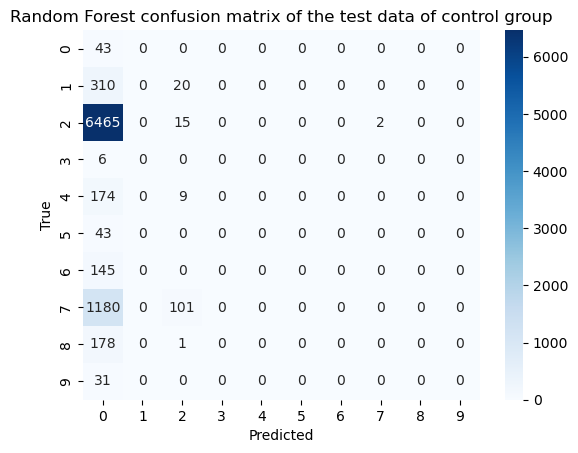

Precision Score: 0.07636988776014518
Accuracy Score: 0.006649088616301731


/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train_selected, label_binarizer.transform(y_train))

# Predict on the test set
y_pred_encoded = rf.predict(X_test_selected)

# Inverse transform the predictions to get the original labels
y_pred = label_binarizer.inverse_transform(y_pred_encoded)

# Calculate accuracy
print(classification_report(y_test['celltype'], y_pred))

# Compute and display the confusion matrix
cm = confusion_matrix(y_test['celltype'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest confusion matrix of the test data of control group')
plt.show()

# Calculate and print precision and accuracy scores
print("Precision Score:", precision_score(y_test['celltype'], y_pred, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test['celltype'], y_pred))

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

selector_all = SelectKBest(f_classif, k=749)
X_train_all = selector_all.fit_transform(X_train, y_train)

# See the gene names of the 50 selected features
all_features = selector_all.get_support(indices=True)
all_gene = X_train.columns[all_features]
print(all_gene)

# Construct a DataFrame to store the selected gene names and their corresponding scores
all_gene_df = pd.DataFrame(all_gene, columns=['Gene Names'])
all_gene_df['Scores'] = selector.scores_[all_features]
all_gene_df = all_gene_df.sort_values(by='Scores', ascending=False)

# Display the DataFrame with selected gene names and scores
print(all_gene_df)

/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['MTRNR2L12', 'HBB', 'MTRNR2L8', 'TAOK1', 'FTL', 'MT-ND1', 'MT-ND2',
       'MT-CO1', 'MT-CO2', 'MT-ATP8',
       ...
       'HERC5', 'CES1', 'EIF2S2', 'HLA-DRB1', 'RPL38', 'CXCL10', 'ACTG1',
       'CANX', 'HNRNPA2B1', 'CSTB'],
      dtype='object', length=749)
    Gene Names       Scores
548   IGLV3-19  1587.224204
151    HSP90B1  1487.754315
276     S100A6   842.690763
300       SUB1   816.478707
505       SSR4   783.955547
..         ...          ...
284       TUBB    10.269405
45         NCL     8.437693
553     NFKBIA     5.971402
97        UPP1     5.254325
1          HBB     0.341240

[749 rows x 2 columns]


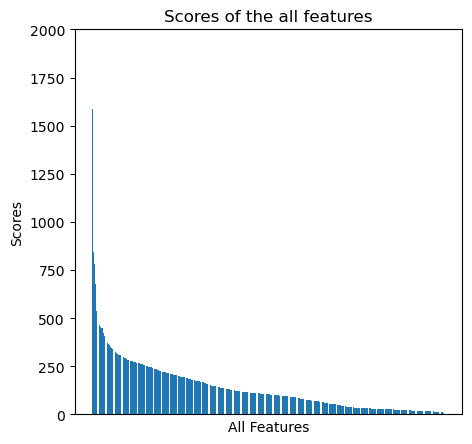

In [39]:
plt.figure(figsize=(5, 5))
plt.bar(all_gene_df['Gene Names'], all_gene_df['Scores'])
plt.xticks([])
plt.ylim(0, 2000)
plt.xlabel('All Features')
plt.ylabel('Scores')
plt.title('Scores of the all features')
plt.show()

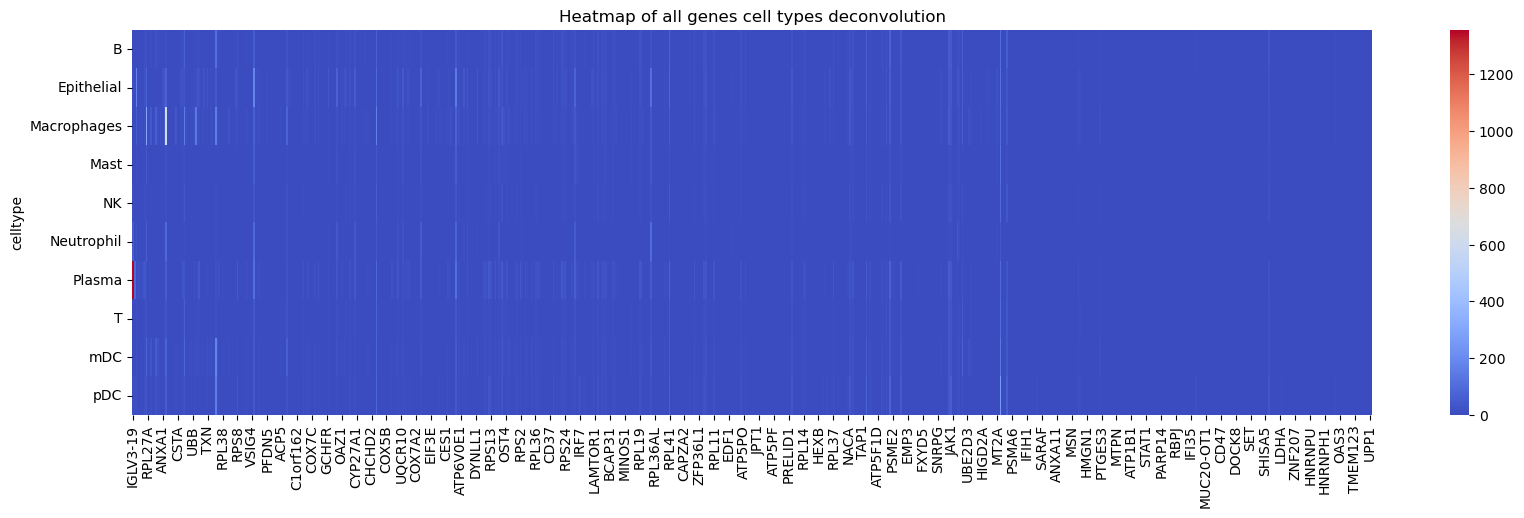

In [40]:
# from X_train_covid, isolate columns according to the 50 selected features

X_train_all = X_train.iloc[:, all_gene_df.index]

X_train_all = pd.concat([X_train_all, y_train['celltype']], axis=1)

# Group rows by 'cell_type_coarse' and calculate the mean of each group

X_train_grouped = X_train_all.groupby(X_train_all['celltype']).mean()
X_train_grouped

# Plot the heatmap to show the transcriptome of the 50 selected genes

plt.figure(figsize=(20, 5))
sns.heatmap(X_train_grouped, cmap='coolwarm')
plt.title('Heatmap of all genes cell types deconvolution')
plt.yticks(rotation=0)
plt.show()

In [43]:
X_train_all = X_train.iloc[:, all_gene_df.index]
X_test_all = X_test.iloc[:, all_gene_df.index]

## Random Forest Classifier

/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

              precision    recall  f1-score   support

           B       0.03      0.47      0.05        43
  Epithelial       0.93      0.08      0.14       330
 Macrophages       0.92      0.98      0.95      6482
        Mast       0.00      0.00      0.00         6
          NK       0.00      0.00      0.00       183
  Neutrophil       0.00      0.00      0.00        43
      Plasma       0.00      0.00      0.00       145
           T       0.83      0.69      0.75      1281
         mDC       0.00      0.00      0.00       179
         pDC       0.00      0.00      0.00        31

    accuracy                           0.83      8723
   macro avg       0.27      0.22      0.19      8723
weighted avg       0.84      0.83      0.82      8723



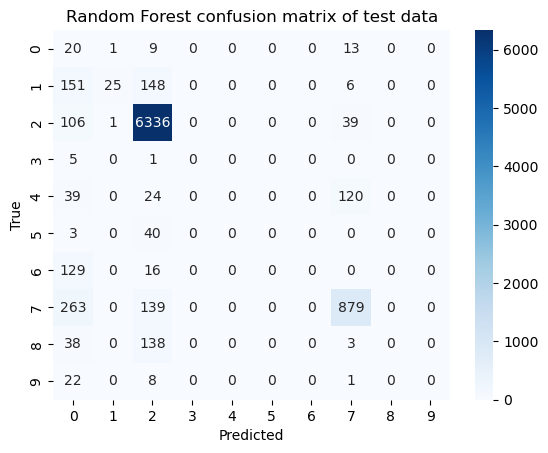

Precision Score: 0.8432502738333961
Accuracy Score: 0.832282471626734


/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train_all, label_binarizer.transform(y_train))

# Predict on the test set
y_pred_encoded = rf.predict(X_test_all)

# Inverse transform the predictions to get the original labels
y_pred = label_binarizer.inverse_transform(y_pred_encoded)

# Calculate accuracy
print(classification_report(y_test['celltype'], y_pred))

# Compute and display the confusion matrix
cm = confusion_matrix(y_test['celltype'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest confusion matrix of test data')
plt.show()

# Calculate and print precision and accuracy scores
print("Precision Score:", precision_score(y_test['celltype'], y_pred, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test['celltype'], y_pred))

/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

              precision    recall  f1-score   support

           B       0.03      0.55      0.05       171
  Epithelial       0.96      0.11      0.19      1227
 Macrophages       0.93      0.98      0.95     25999
        Mast       0.00      0.00      0.00        32
          NK       0.00      0.00      0.00       665
  Neutrophil       0.00      0.00      0.00       154
      Plasma       0.00      0.00      0.00       700
           T       0.84      0.69      0.76      5162
         mDC       0.00      0.00      0.00       672
         pDC       0.00      0.00      0.00       107

    accuracy                           0.84     34889
   macro avg       0.28      0.23      0.20     34889
weighted avg       0.85      0.84      0.83     34889



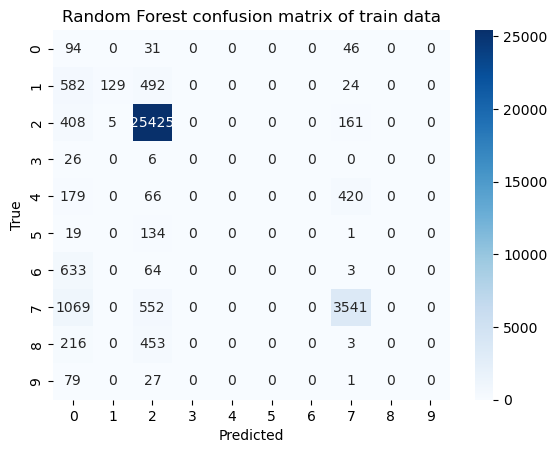

Precision Score: 0.8540204690835559
Accuracy Score: 0.8366247241250824


/home/okwong/miniconda3/envs/ML/lib/python3.12/site-packages/scikit_learn-1.5.2-py3.12-linux-x86_64.egg/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Predict on the train set
y_train_pred_encoded = rf.predict(X_train_all)

# Inverse transform the predictions to get the original labels
y_train_pred = label_binarizer.inverse_transform(y_train_pred_encoded)

# Calculate accuracy
print(classification_report(y_train['celltype'], y_train_pred))

# Compute and display the confusion matrix
cm = confusion_matrix(y_train['celltype'], y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest confusion matrix of train data')
plt.show()

# Calculate and print precision and accuracy scores
print("Precision Score:", precision_score(y_train['celltype'], y_train_pred, average='weighted'))
print("Accuracy Score:", accuracy_score(y_train['celltype'], y_train_pred))

## KNN

K-Nearest Neighbors:
              precision    recall  f1-score   support

           B       0.14      0.63      0.23        43
  Epithelial       0.87      0.72      0.79       330
 Macrophages       0.95      0.97      0.96      6482
        Mast       1.00      0.17      0.29         6
          NK       0.69      0.18      0.29       183
  Neutrophil       0.75      0.07      0.13        43
      Plasma       0.83      0.82      0.83       145
           T       0.84      0.87      0.85      1281
         mDC       0.83      0.59      0.69       179
         pDC       0.88      0.71      0.79        31

    accuracy                           0.91      8723
   macro avg       0.78      0.57      0.58      8723
weighted avg       0.92      0.91      0.91      8723



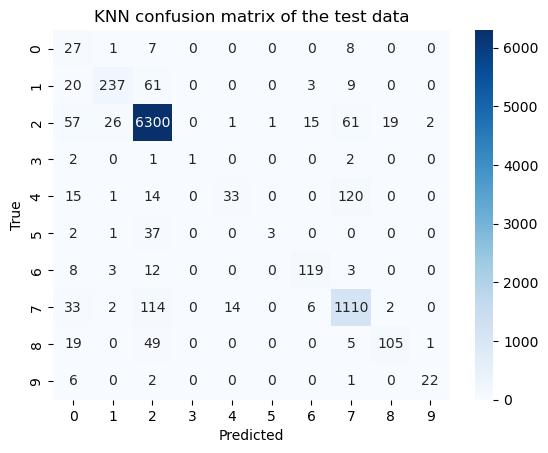

Precision Score: 0.9198799411896518
Accuracy Score: 0.9121861744812565


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier

# Train a K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train_all, label_binarizer.transform(y_train))

# Predict with KNN
y_pred_knn_encoded = knn.predict(X_test_all)
y_pred_knn = label_binarizer.inverse_transform(y_pred_knn_encoded)

# Calculate and print results for KNN
print("K-Nearest Neighbors:")
print(classification_report(y_test['celltype'], y_pred_knn))
cm_knn = confusion_matrix(y_test['celltype'], y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN confusion matrix of the test data')
plt.show()
print("Precision Score:", precision_score(y_test['celltype'], y_pred_knn, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test['celltype'], y_pred_knn))

K-Nearest Neighbors:
              precision    recall  f1-score   support

           B       0.16      0.78      0.27       171
  Epithelial       0.89      0.74      0.81      1227
 Macrophages       0.97      0.98      0.97     25999
        Mast       1.00      0.16      0.27        32
          NK       0.86      0.31      0.46       665
  Neutrophil       0.76      0.10      0.18       154
      Plasma       0.89      0.85      0.87       700
           T       0.88      0.89      0.88      5162
         mDC       0.87      0.68      0.76       672
         pDC       0.90      0.62      0.73       107

    accuracy                           0.93     34889
   macro avg       0.82      0.61      0.62     34889
weighted avg       0.94      0.93      0.93     34889



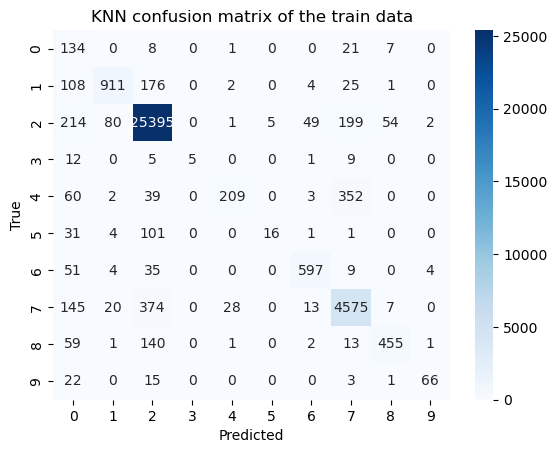

Precision Score: 0.9400941752510356
Accuracy Score: 0.9275989566912207


In [52]:
# Predict with KNN
y_train_pred_knn_encoded = knn.predict(X_train_all)
y_train_pred_knn = label_binarizer.inverse_transform(y_train_pred_knn_encoded)

# Calculate and print results for KNN
print("K-Nearest Neighbors:")
print(classification_report(y_train['celltype'], y_train_pred_knn))
cm_knn = confusion_matrix(y_train['celltype'], y_train_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN confusion matrix of the train data')
plt.show()
print("Precision Score:", precision_score(y_train['celltype'], y_train_pred_knn, average='weighted'))
print("Accuracy Score:", accuracy_score(y_train['celltype'], y_train_pred_knn))

## ExtraTreesClassifier

ExtraTreesClassifier:
              precision    recall  f1-score   support

           B       0.11      0.79      0.19        43
  Epithelial       0.95      0.69      0.80       330
 Macrophages       0.97      0.98      0.97      6482
        Mast       1.00      0.50      0.67         6
          NK       1.00      0.57      0.72       183
  Neutrophil       1.00      0.23      0.38        43
      Plasma       0.86      0.74      0.80       145
           T       0.93      0.89      0.91      1281
         mDC       0.99      0.40      0.57       179
         pDC       1.00      0.77      0.87        31

    accuracy                           0.93      8723
   macro avg       0.88      0.66      0.69      8723
weighted avg       0.95      0.93      0.93      8723



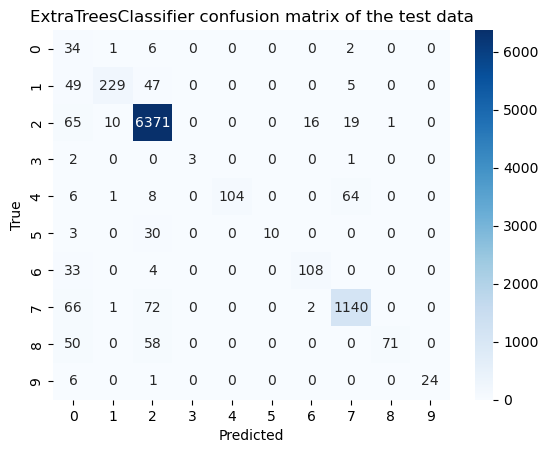

Precision Score: 0.95459954935041
Accuracy Score: 0.9278917803507968


In [48]:
# Train an ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees.fit(X_train_all, label_binarizer.transform(y_train))

# Predict with ExtraTreesClassifier
y_pred_extra_trees_encoded = extra_trees.predict(X_test_all)
y_pred_extra_trees = label_binarizer.inverse_transform(y_pred_extra_trees_encoded)

# Calculate and print results for ExtraTreesClassifier
print("ExtraTreesClassifier:")
print(classification_report(y_test['celltype'], y_pred_extra_trees))
cm_extra_trees = confusion_matrix(y_test['celltype'], y_pred_extra_trees)
sns.heatmap(cm_extra_trees, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ExtraTreesClassifier confusion matrix of the test data')
plt.show()
print("Precision Score:", precision_score(y_test['celltype'], y_pred_extra_trees, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test['celltype'], y_pred_extra_trees))

ExtraTreesClassifier:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       171
  Epithelial       1.00      1.00      1.00      1227
 Macrophages       1.00      1.00      1.00     25999
        Mast       1.00      1.00      1.00        32
          NK       1.00      1.00      1.00       665
  Neutrophil       1.00      1.00      1.00       154
      Plasma       1.00      1.00      1.00       700
           T       1.00      1.00      1.00      5162
         mDC       1.00      1.00      1.00       672
         pDC       1.00      1.00      1.00       107

    accuracy                           1.00     34889
   macro avg       1.00      1.00      1.00     34889
weighted avg       1.00      1.00      1.00     34889



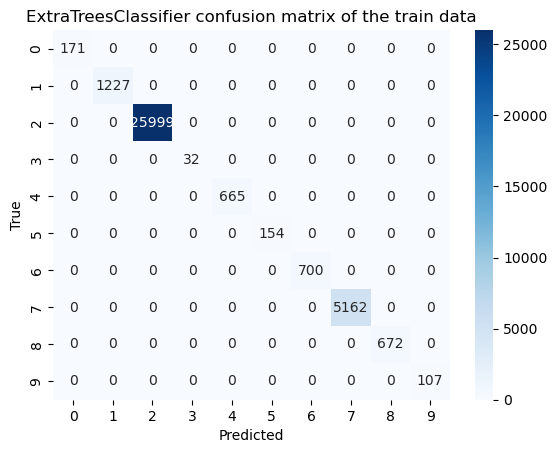

Precision Score: 1.0
Accuracy Score: 1.0


In [53]:
# Predict with ExtraTreesClassifier
y_train_pred_extra_trees_encoded = extra_trees.predict(X_train_all)
y_train_pred_extra_trees = label_binarizer.inverse_transform(y_train_pred_extra_trees_encoded)

# Calculate and print results for ExtraTreesClassifier
print("ExtraTreesClassifier:")
print(classification_report(y_train['celltype'], y_train_pred_extra_trees))
cm_extra_trees = confusion_matrix(y_train['celltype'], y_train_pred_extra_trees)
sns.heatmap(cm_extra_trees, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ExtraTreesClassifier confusion matrix of the train data')
plt.show()
print("Precision Score:", precision_score(y_train['celltype'], y_train_pred_extra_trees, average='weighted'))
print("Accuracy Score:", accuracy_score(y_train['celltype'], y_train_pred_extra_trees))